<a href="https://colab.research.google.com/github/malakelbasha78/AI-Skills-Projects/blob/main/EfficientNet_B3_jpter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("divyasharma20/plantv")

print("Path to dataset files:", path)

100%|██████████| 825M/825M [00:21<00:00, 40.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/divyasharma20/plantv/versions/1


In [ ]:
import os

print("Dataset path:", path)
for root, dirs, files in os.walk(path):
    print("Root:", root)
    print("Folders:", dirs)
    print("Files sample:", files[:5])
    break



Dataset path: /root/.cache/kagglehub/datasets/divyasharma20/plantv/versions/1
Root: /root/.cache/kagglehub/datasets/divyasharma20/plantv/versions/1
Folders: ['PlantVillage']
Files sample: []


In [ ]:
plantv_path = os.path.join(path, "PlantVillage")
print("Folders/files inside PlantVillage:")
print(os.listdir(plantv_path)[:20])


Folders/files inside PlantVillage:
['train', 'val']


In [ ]:
import os
dataset_path = plantv_path
train_path = os.path.join(dataset_path, "train")
val_path   = os.path.join(dataset_path, "val")

classes = os.listdir(train_path)
print(f"Number of classes: {len(classes)}")
print("Sample classes:", classes[:10], "...")


print("\nNumber of images per class in TRAIN:")
total_train = 0
for cls in classes:
    cls_path = os.path.join(train_path, cls)
    num_images = len(os.listdir(cls_path))
    total_train += num_images
    print(f"{cls}: {num_images} images")


print("\nNumber of images per class in VALIDATION:")
total_val = 0
for cls in classes:
    cls_path = os.path.join(val_path, cls)
    num_images = len(os.listdir(cls_path))
    total_val += num_images
    print(f"{cls}: {num_images} images")


print("\nTotal images:")
print(f"Train: {total_train}")
print(f"Validation: {total_val}")
print(f"Overall: {total_train + total_val}")


Number of classes: 39
Sample classes: ['Tomato___healthy', 'Grape___Esca_(Black_Measles)', 'Corn_(maize)___Common_rust_', 'Tomato___Leaf_Mold', 'Grape___healthy', 'Peach___healthy', 'Apple___Cedar_apple_rust', 'Grape___Black_rot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'] ...

Number of images per class in TRAIN:
Tomato___healthy: 1273 images
Grape___Esca_(Black_Measles): 1107 images
Corn_(maize)___Common_rust_: 953 images
Tomato___Leaf_Mold: 761 images
Grape___healthy: 339 images
Peach___healthy: 288 images
Apple___Cedar_apple_rust: 220 images
Grape___Black_rot: 944 images
Tomato___Spider_mites Two-spotted_spider_mite: 1341 images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 410 images
Tomato___Target_Spot: 1123 images
Tomato___Septoria_leaf_spot: 1417 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 4286 images
Pepper,_bell___Bacterial_spot: 797 images
Tomato___Early_blight: 800 images
Cherry_(including_sour)___healthy

In [ ]:
import os
import shutil
dataset_path = plantv_path
train_path = os.path.join(dataset_path, "train")
val_path   = os.path.join(dataset_path, "val")


merged_path = "/content/PlantVillage_all"
os.makedirs(merged_path, exist_ok=True)


classes = os.listdir(train_path)

for cls in classes:
    cls_merged_path = os.path.join(merged_path, cls)
    os.makedirs(cls_merged_path, exist_ok=True)


    for img in os.listdir(os.path.join(train_path, cls)):
        shutil.copy(os.path.join(train_path, cls, img), os.path.join(cls_merged_path, img))


    for img in os.listdir(os.path.join(val_path, cls)):
        shutil.copy(os.path.join(val_path, cls, img), os.path.join(cls_merged_path, img))

print("All images are now in one folder per class without any train/validation split!")


All images are now in one folder per class without any train/validation split!


In [ ]:
print("Classes in merged dataset:", os.listdir(merged_path)[:10])
for cls in os.listdir(merged_path):
    cls_path = os.path.join(merged_path, cls)
    print(f"{cls}: {len(os.listdir(cls_path))} images")


Classes in merged dataset: ['Tomato___healthy', 'Grape___Esca_(Black_Measles)', 'Corn_(maize)___Common_rust_', 'Tomato___Leaf_Mold', 'Grape___healthy', 'Peach___healthy', 'Apple___Cedar_apple_rust', 'Grape___Black_rot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']
Tomato___healthy: 1591 images
Grape___Esca_(Black_Measles): 1383 images
Corn_(maize)___Common_rust_: 1192 images
Tomato___Leaf_Mold: 952 images
Grape___healthy: 423 images
Peach___healthy: 360 images
Apple___Cedar_apple_rust: 275 images
Grape___Black_rot: 1180 images
Tomato___Spider_mites Two-spotted_spider_mite: 1676 images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 513 images
Tomato___Target_Spot: 1404 images
Tomato___Septoria_leaf_spot: 1771 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 5357 images
Pepper,_bell___Bacterial_spot: 997 images
Tomato___Early_blight: 1000 images
Cherry_(including_sour)___healthy: 854 images
Peach___Bacterial_spot: 2297 images
P

In [ ]:
import os


merged_path = "/content/PlantVillage_all"

classes = os.listdir(merged_path)


num_classes = len(classes)


total_images = sum(len(os.listdir(os.path.join(merged_path, cls))) for cls in classes)

print(f"Number of classes: {num_classes}")
print(f"Total number of images after merging: {total_images}")


Number of classes: 39
Total number of images after merging: 55020


In [ ]:

import os
import shutil


dataset_path = "/content/PlantVillage_all"


backup_path = "/content/PlantVillage_backup"
os.makedirs(backup_path, exist_ok=True)


for cls in os.listdir(dataset_path):
    cls_path = os.path.join(dataset_path, cls)
    cls_backup_path = os.path.join(backup_path, cls)
    os.makedirs(cls_backup_path, exist_ok=True)

    for img_name in os.listdir(cls_path):
        src_path = os.path.join(cls_path, img_name)
        dst_path = os.path.join(cls_backup_path, img_name)
        shutil.copy(src_path, dst_path)

print(f"Backup completed! All original images are saved in {backup_path}")


Backup completed! All original images are saved in /content/PlantVillage_backup


In [ ]:
from PIL import Image
import hashlib
import os

def remove_duplicates(dataset_path):
    hashes = {}
    removed_count = 0
    total_images_before = sum(len(os.listdir(os.path.join(dataset_path, cls))) for cls in os.listdir(dataset_path))
    print(f"Total images before removing duplicates: {total_images_before}")

    for cls in os.listdir(dataset_path):
        cls_path = os.path.join(dataset_path, cls)
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            with Image.open(img_path) as img:
                img_hash = hashlib.md5(img.tobytes()).hexdigest()
            if img_hash in hashes:
                os.remove(img_path)
                removed_count += 1
            else:
                hashes[img_hash] = img_path

    total_images_after = sum(len(os.listdir(os.path.join(dataset_path, cls))) for cls in os.listdir(dataset_path))
    print(f"Removed {removed_count} duplicate images.")
    print(f"Total images after removing duplicates: {total_images_after}")

remove_duplicates("/content/PlantVillage_all")


Total images before removing duplicates: 55020
Removed 24 duplicate images.
Total images after removing duplicates: 54996


In [ ]:
import cv2
import numpy as np

def enhance_blurry_images(dataset_path, threshold=100):
    total_images = 0
    blurry_images = 0

    for cls in os.listdir(dataset_path):
        cls_path = os.path.join(dataset_path, cls)
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue
            total_images += 1
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            fm = cv2.Laplacian(gray, cv2.CV_64F).var()

            if fm < threshold:
                blurry_images += 1

                kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
                sharp = cv2.filter2D(img, -1, kernel)
                cv2.imwrite(img_path, sharp)

    print(f"Total images processed: {total_images}")
    print(f"Number of blurry images enhanced: {blurry_images}")

enhance_blurry_images("/content/PlantVillage_all", threshold=100)


Total images processed: 54996
Number of blurry images enhanced: 3485


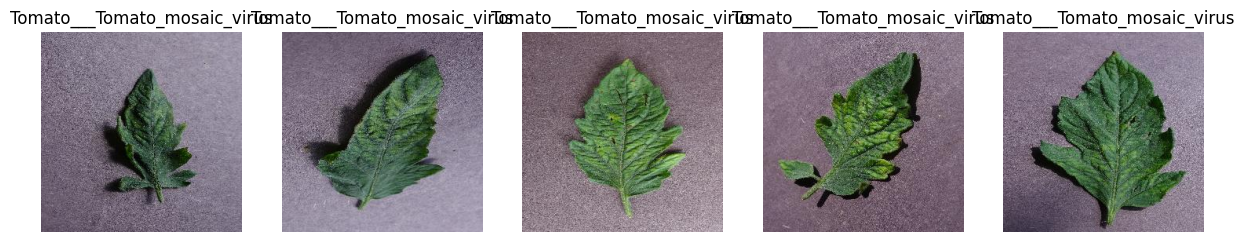

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

enhanced_path = "/content/PlantVillage_all"

cls = random.choice(os.listdir(enhanced_path))
cls_path = os.path.join(enhanced_path, cls)

# اختيار 5 صور عشوائية من الكلاس
sample_images = random.sample(os.listdir(cls_path), 5)

plt.figure(figsize=(15,5))

for i, img_name in enumerate(sample_images):
    img_path = os.path.join(cls_path, img_name)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 5, i+1)
    plt.imshow(img_rgb)
    plt.title(f"{cls}")
    plt.axis('off')

plt.show()


In [ ]:
import os
from PIL import Image

root = "/content/PlantVillage_all"

converted = 0
total = 0

for cls in os.listdir(root):
    cls_path = os.path.join(root, cls)

    if not os.path.isdir(cls_path):
        continue

    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        total += 1

        try:
            img = Image.open(img_path)

            if img.mode != "RGB":
                img = img.convert("RGB")
                img.save(img_path)
                converted += 1

        except:
            print("Error reading:", img_path)

print(f"Total Images: {total}")
print(f"Converted to RGB: {converted}")
print(f"Remaining Already RGB: {total - converted}")

Total Images: 54996
Converted to RGB: 1
Remaining Already RGB: 54995


In [ ]:

from torchvision import datasets

full_dataset = datasets.ImageFolder(dataset_path)


In [ ]:

from torch.utils.data import random_split

total_len = len(full_dataset)
train_size = int(0.7 * total_len)
val_size   = int(0.15 * total_len)
test_size  = total_len - train_size - val_size  # يبقى تقريباً 15%

train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

print(f"Train size: {len(train_dataset)}")
print(f"Validation size: {len(val_dataset)}")
print(f"Test size: {len(test_dataset)}")


Train size: 38497
Validation size: 8249
Test size: 8250


In [ ]:
from torchvision import transforms


train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.RandomResizedCrop(224, scale=(0.8,1.0)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])
    #scaling and normalize test &val
val_test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])


In [ ]:

from torch.utils.data import Dataset

class TransformedSubset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, index):
        # Retrieve the original image and label from the subset
        image, label = self.subset[index]
        if self.transform is not None:
            image = self.transform(image)
        return image, label

    def __len__(self):
        return len(self.subset)


train_dataset_transformed = TransformedSubset(train_dataset, transform=train_transforms)
val_dataset_transformed = TransformedSubset(val_dataset, transform=val_test_transforms)
test_dataset_transformed = TransformedSubset(test_dataset, transform=val_test_transforms)


In [ ]:

from torch.utils.data import WeightedRandomSampler


train_labels = [label for _, label in train_dataset]
class_counts_train = [0] * len(full_dataset.classes)
for label in train_labels:
    class_counts_train[label] += 1

class_weights_train = [0.] * len(class_counts_train)
total_count_train = sum(class_counts_train)
for i, count in enumerate(class_counts_train):
    if count > 0:
        class_weights_train[i] = total_count_train / (len(class_counts_train) * count)
    else:
        class_weights_train[i] = 0


sample_weights = [class_weights_train[label] for label in train_labels]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)


In [ ]:
# هنا بقسم الداتا لباتشز علشان تخلي الموديل يدخله داتا اكتر وةيبقى اسرع في كل ايبوك
from torch.utils.data import DataLoader

# Use the transformed datasets in the DataLoaders
train_loader = DataLoader(train_dataset_transformed, batch_size=32, sampler=sampler)
val_loader   = DataLoader(val_dataset_transformed, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset_transformed, batch_size=32, shuffle=False)


# ** testing after data processing



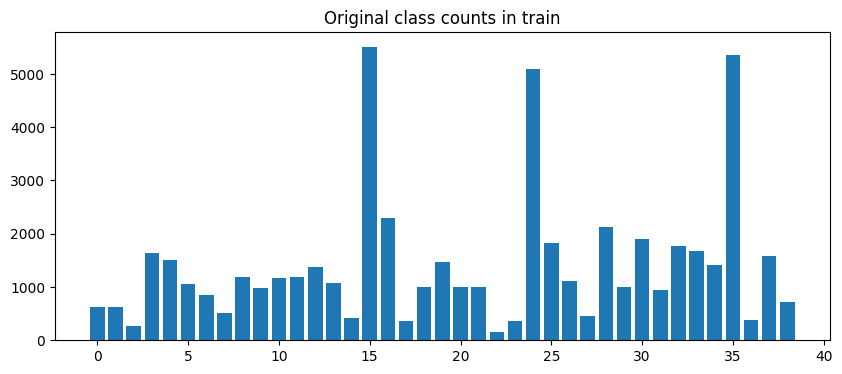

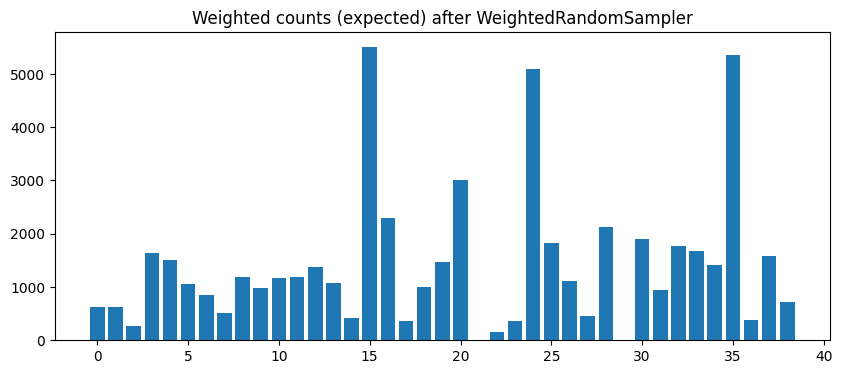

In [ ]:
# بعمل تشيك على ال  imbalance classes  يعد ما اسخدمت weightsampler
import torch
import matplotlib.pyplot as plt
from torch.utils.data import WeightedRandomSampler
import numpy as np

# حساب عدد العينات لكل class
class_counts = [0] * len(full_dataset.classes)
for _, label in train_dataset.dataset.samples:
    class_counts[label] += 1

# حساب الوزن لكل class
total_count = sum(class_counts)
class_weights = np.array([total_count / (len(class_counts) * c) for c in class_counts])

# وزن كل صورة في train
sample_weights = [class_weights[label] for _, label in train_dataset.dataset.samples]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# عرض histogram قبل الوزن
plt.figure(figsize=(10,4))
plt.bar(range(len(class_counts)), class_counts)
plt.title("Original class counts in train")
plt.show()

# توزيع متوقع بعد sampler
weighted_counts = [0]*len(class_counts)
for w in sample_weights:
    weighted_counts[int(np.argmin(np.abs(class_weights - w)))] += 1

plt.figure(figsize=(10,4))
plt.bar(range(len(class_counts)), weighted_counts)
plt.title("Weighted counts (expected) after WeightedRandomSampler")
plt.show()



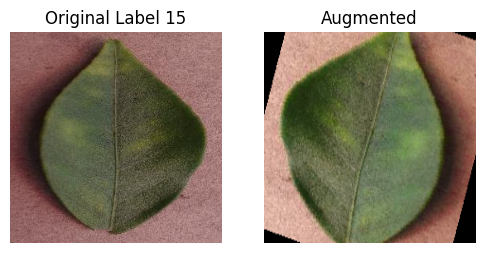

In [ ]:
from PIL import Image
from torchvision import transforms
import random
import matplotlib.pyplot as plt

idx = random.randint(0, len(train_dataset)-1)
img_original_pil, label = train_dataset[idx]

# عرض الصورة الأصلية (img_original_pil هو بالفعل PIL Image)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(img_original_pil)
plt.title(f"Original Label {label}")
plt.axis('off')

# تعريف Augmentation
aug_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.RandomResizedCrop(224, scale=(0.8,1.0)),
    transforms.ToTensor() # ستحول PIL Image إلى Tensor
])

# تطبيق Augmentation على PIL Image. النتيجة ستكون Tensor.
img_aug_tensor = aug_transform(img_original_pil)

# تحويل Tensor للعرض (من [C, H, W] إلى [H, W, C])
img_aug_np = img_aug_tensor.permute(1,2,0).numpy()
plt.subplot(1,2,2)

plt.imshow((img_aug_np - img_aug_np.min())/(img_aug_np.max()-img_aug_np.min()))
plt.title("Augmented")
plt.axis('off')
plt.show()

In [ ]:
from torchvision import transforms

# التحويل اللي عايزين نطبقه للفحص
transform_check = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# اختيار أي index للفحص
idx = 0

# شيل transform مؤقتًا عشان ناخد PIL Image أصلية
original_transform = train_dataset.dataset.transform
train_dataset.dataset.transform = None

# اخد الصورة والlabel بدون أي transform
raw_img, label = train_dataset[idx]

# طبق  transform للفحص
img_trans = transform_check(raw_img)

train_dataset.dataset.transform = original_transform
class_name = train_dataset.dataset.classes[label]

print(f"Class label index: {label}")
print(f"Class name: {class_name}")
print(f"Tensor shape: {img_trans.shape}")
print(f"Pixel value range: min={img_trans.min():.3f}, max={img_trans.max():.3f}")


Class label index: 31
Class name: Tomato___Leaf_Mold
Tensor shape: torch.Size([3, 224, 224])
Pixel value range: min=-2.118, max=1.716


Batch images shape: torch.Size([8, 3, 224, 224])
Batch labels (indices): tensor([11, 13, 31, 13, 28,  0,  0,  2])


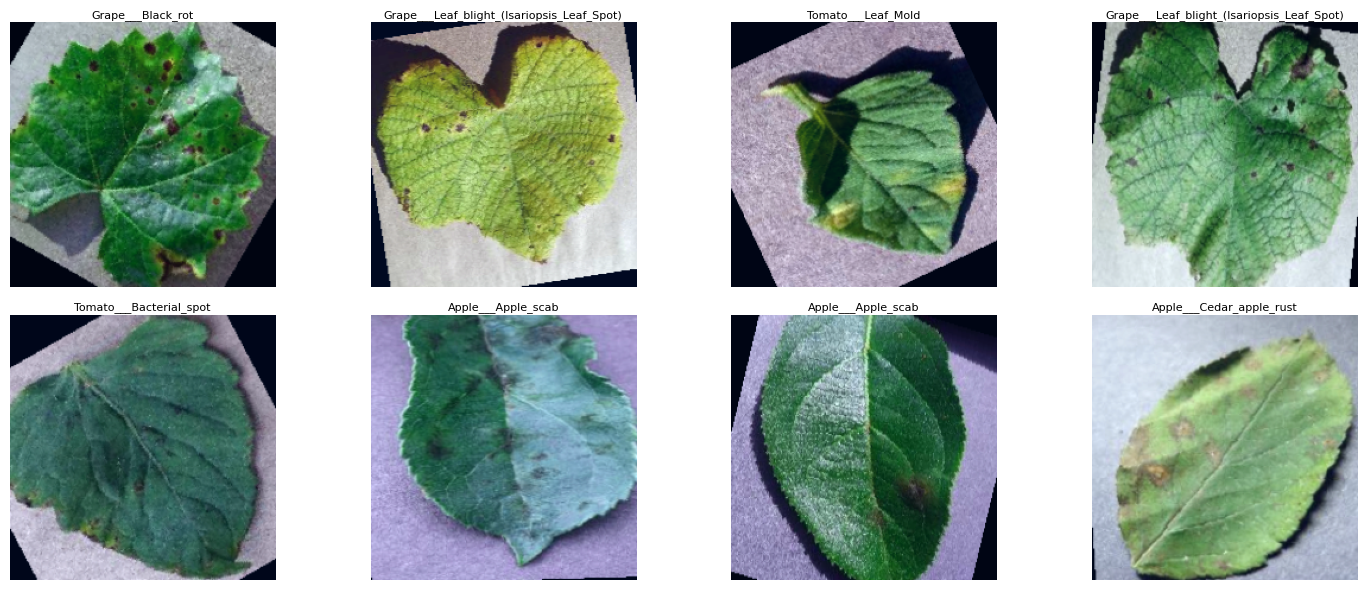

In [ ]:
from torch.utils.data import DataLoader, random_split, WeightedRandomSampler
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Re-initialization of dataset components for consistency --- #
# Ensure dataset_path points to the merged and processed directory
dataset_path = "/content/PlantVillage_all"

# Re-initialize full_dataset (basic_transform for ImageFolder first, then transformed subsets)
basic_transform = transforms.Compose([
    transforms.Resize((224, 224)), # Only resize for initial ImageFolder load
])
full_dataset = datasets.ImageFolder(dataset_path, transform=basic_transform)

# Redefine transforms (if they changed or to ensure they are available)
train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.RandomResizedCrop(224, scale=(0.8,1.0)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])
val_test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# Re-split datasets
total_len = len(full_dataset)
train_size = int(0.7 * total_len)
val_size   = int(0.15 * total_len)
test_size  = total_len - train_size - val_size

# Ensure reproducibility for splitting if needed
torch.manual_seed(42)
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

# Define TransformedSubset wrapper (if not already globally defined)
class TransformedSubset(torch.utils.data.Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, index):
        image, label = self.subset[index]
        if self.transform is not None:
            image = self.transform(image)
        return image, label

    def __len__(self):
        return len(self.subset)

# Re-wrap subsets with transforms
train_dataset_transformed = TransformedSubset(train_dataset, transform=train_transforms)
val_dataset_transformed = TransformedSubset(val_dataset, transform=val_test_transforms)
test_dataset_transformed = TransformedSubset(test_dataset, transform=val_test_transforms)

# Re-calculate sampler for train_loader
train_labels = [label for _, label in train_dataset] # Iterate on the raw subset to get labels
class_counts_train = [0] * len(full_dataset.classes)
for label in train_labels:
    class_counts_train[label] += 1

class_weights_train = [0.] * len(class_counts_train)
total_count_train = sum(class_counts_train)
for i, count in enumerate(class_counts_train):
    if count > 0:
        class_weights_train[i] = total_count_train / (len(class_counts_train) * count)
    else:
        class_weights_train[i] = 0
sample_weights = [class_weights_train[label] for label in train_labels]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# --- End Re-initialization --- #

# batch size for visualization (can be different from training batch size)
batch_size = 8

# Create train_loader specifically for this visualization
train_loader = DataLoader(train_dataset_transformed, batch_size=batch_size, sampler=sampler)

# Get the first batch
batch_imgs, batch_labels = next(iter(train_loader))
print(f"Batch images shape: {batch_imgs.shape}")
print(f"Batch labels (indices): {batch_labels}")

# Organize images in rows
n_cols = 4
n_rows = len(batch_imgs) // n_cols + (len(batch_imgs) % n_cols > 0)

plt.figure(figsize=(15, 3*n_rows))

for i in range(len(batch_imgs)):
    # PyTorch Tensor [C,H,W] → Matplotlib [H,W,C]
    img = batch_imgs[i].permute(1,2,0).numpy()

    # Convert values to range [0, 1] for display
    img = (img - img.min()) / (img.max() - img.min())

    # Get class name
    class_name = full_dataset.classes[batch_labels[i].item()]

    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(img)
    plt.title(class_name, fontsize=8, pad=3)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:

"""Plant Disease Classification Project - Complete Implementation"""

!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 -q
!pip install matplotlib seaborn tqdm scikit-learn pandas numpy pillow opencv-python grad-cam -q
!pip install streamlit -q

import torch
print(f"✅ PyTorch {torch.__version__} installed")
print(f"   CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"   GPU: {torch.cuda.get_device_name(0)}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 137.6 MB/s eta 0:00:00
✅ PyTorch 2.9.0+cu126 installed
   CUDA available: True
   GPU: Tesla T4


In [ ]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import cv2
from PIL import Image
import random
import warnings
warnings.filterwarnings('ignore')


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split, WeightedRandomSampler
from torchvision import transforms, models, datasets
import torch.nn.functional as F
from torch.optim.lr_scheduler import CosineAnnealingLR, ReduceLROnPlateau


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support



In [ ]:

dataset_path = "/content/PlantVillage_all"

if not os.path.exists(dataset_path):
    print(f"The path {dataset_path} does not exist!")
    print("   Make sure to run the preprocessing code first")

    os.makedirs(dataset_path, exist_ok=True)
    os.makedirs(os.path.join(dataset_path, "test_class"), exist_ok=True)
    print("   A temporary structure has been created for continuation")
else:

    classes = os.listdir(dataset_path)
    print(f" Found {len(classes)} classes")

    total_images = 0
    class_counts = {}

    for cls in classes[:10]:
        cls_path = os.path.join(dataset_path, cls)
        if os.path.isdir(cls_path):
            num_images = len(os.listdir(cls_path))
            class_counts[cls] = num_images
            total_images += num_images
            print(f"   {cls}: {num_images} images")

    print(f"\n Total images: {total_images}")
    print(f"Average images per class: {total_images/len(classes):.1f}")


✅ Found 39 classes
   Tomato___healthy: 1585 images
   Grape___Esca_(Black_Measles): 1383 images
   Corn_(maize)___Common_rust_: 1192 images
   Tomato___Leaf_Mold: 952 images
   Grape___healthy: 423 images
   Peach___healthy: 360 images
   Apple___Cedar_apple_rust: 275 images
   Grape___Black_rot: 1180 images
   Tomato___Spider_mites Two-spotted_spider_mite: 1676 images
   Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 513 images

📊 Total images: 9539
📈 Average images per class: 244.6


In [ ]:
# Basic initial transformations
basic_transform = transforms.Compose([
    transforms.Resize((224, 224)), # Only resizing, no Tensor conversion here
])

# Load the full Dataset
print(" Loading Dataset...")
full_dataset = datasets.ImageFolder(dataset_path, transform=basic_transform)

print(f" Dataset loaded successfully!")
print(f" Number of samples: {len(full_dataset)}")
print(f" Number of classes: {len(full_dataset.classes)}")
print(f" Sample class names: {full_dataset.classes[:5]}")

# Display a sample image
sample_idx = 42
sample_img, sample_label = full_dataset[sample_idx]
print(f"\n📸 Sample #{sample_idx}:")
print(f"  Image type after initial transform: {type(sample_img)}") # Should be a PIL Image
print(f"  Numeric label: {sample_label}")
print(f"  Class name: {full_dataset.classes[sample_label]}")
# Value range will only be available after conversion to Tensor


🔄 Loading Dataset...
✅ Dataset loaded successfully!
📁 Number of samples: 54996
🎯 Number of classes: 39
📝 Sample class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']

📸 Sample #42:
  Image type after initial transform: <class 'PIL.Image.Image'>
  Numeric label: 0
  Class name: Apple___Apple_scab


In [ ]:

train_transforms = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize before cropping
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),  # Tensor conversion here
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])



print(" Transforms applied:")
print("  - Training: with Data Augmentation")
print("  - Validation/Test: without Augmentation")


✅ Transforms applied:
  - Training: with Data Augmentation
  - Validation/Test: without Augmentation


In [ ]:
class EnhancedEfficientNetB3(nn.Module):
    """Enhanced EfficientNet-B3 for plant disease classification"""

    def __init__(self, num_classes, pretrained=True):
        super(EnhancedEfficientNetB3, self).__init__()


        if pretrained:
            weights = models.EfficientNet_B3_Weights.IMAGENET1K_V1
            self.base_model = models.efficientnet_b3(weights=weights)
            print("✅ Pretrained weights loaded successfully")
        else:
            self.base_model = models.efficientnet_b3()
            print("✅ Model initialized from scratch")


        for param in self.base_model.parameters():
            param.requires_grad = False


        in_features = self.base_model.classifier[1].in_features


        self.classifier = nn.Sequential(
            nn.Dropout(p=0.3),
            nn.Linear(in_features, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.2),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )


        self.base_model.classifier = self.classifier


        for param in self.base_model.classifier.parameters():
            param.requires_grad = True

    def forward(self, x):
        return self.base_model(x)

    def unfreeze_percentage(self, percentage=0.5):
        """Unfreeze a percentage of layers"""

        features = list(self.base_model.features.children())
        num_layers = len(features)
        layers_to_unfreeze = int(num_layers * percentage)


        for layer in features[-layers_to_unfreeze:]:
            for param in layer.parameters():
                param.requires_grad = True

        print(f"🔓 Unfroze {layers_to_unfreeze}/{num_layers} layers")



num_classes = len(full_dataset.classes)
model = EnhancedEfficientNetB3(num_classes=num_classes, pretrained=True)

print(f"\n📊 Model information:")
print(f"  Number of classes: {num_classes}")
print(f"  Total parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"  Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
print(f"  Device: {device}")


Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-b3899882.pth


100%|██████████| 47.2M/47.2M [00:00<00:00, 193MB/s]


✅ Pretrained weights loaded successfully

📊 Model information:
  Number of classes: 39
  Total parameters: 11,626,063
  Trainable parameters: 929,831
  Device: cuda


In [ ]:
from torch.utils.data import DataLoader, WeightedRandomSampler
import numpy as np

# Calculate class distribution to handle imbalance
print("📊 Calculating class distribution in the training data...")

# Count number of samples per class in train_dataset
# It's important to base class_counts on the actual train_dataset labels
# Ensure full_dataset is accessible for its .targets attribute

num_classes = len(full_dataset.classes)  # Ensure num_classes is defined
class_counts = [0] * num_classes
for idx in train_dataset.indices:
    label = full_dataset.targets[idx]
    class_counts[label] += 1

print(f"  Smallest class: {min(class_counts)} samples")
print(f"  Largest class: {max(class_counts)} samples")
print(f"  Mean size: {np.mean(class_counts):.1f} samples")

# Compute weights for each class
class_weights = 1.0 / torch.tensor(class_counts, dtype=torch.float)

# Get the actual class label for each sample in the train_dataset subset
# And then map these labels to their pre-calculated class weights
train_labels_for_sampling = [full_dataset.targets[idx] for idx in train_dataset.indices]
sample_weights = torch.tensor([class_weights[label] for label in train_labels_for_sampling], dtype=torch.float)

# Create sampler
sampler = WeightedRandomSampler(
    weights=sample_weights,
    num_samples=len(train_dataset_transformed),  # Use length of transformed dataset
    replacement=True
)

# Create DataLoaders
batch_size = 32

train_loader = DataLoader(
    train_dataset_transformed,  # Use the transformed dataset
    batch_size=batch_size,
    sampler=sampler,
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False,
    drop_last=True  # Added drop_last=True for consistency if not present
)

val_loader = DataLoader(
    val_dataset_transformed,   # Use the transformed dataset
    batch_size=batch_size,
    shuffle=False,
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

test_loader = DataLoader(
    test_dataset_transformed,  # Use the transformed dataset
    batch_size=batch_size,
    shuffle=False,
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

print(f"\n✅ DataLoaders created:")
print(f"  Batch size: {batch_size}")
print(f"  Training batches: {len(train_loader)}")
print(f"  Validation batches: {len(val_loader)}")
print(f"  Test batches: {len(test_loader)}")

# Test first batch
print("\n🔍 Testing the first batch of data...")
for images, labels in train_loader:
    print(f"  Batch shape: {images.shape}")
    print(f"  Labels shape: {labels.shape}")
    print(f"  Value range in images: [{images.min():.3f}, {images.max():.3f}]")
    break


📊 Calculating class distribution in the training data...
  Smallest class: 112 samples
  Largest class: 3897 samples
  Mean size: 987.1 samples

✅ DataLoaders created:
  Batch size: 32
  Training batches: 1203
  Validation batches: 258
  Test batches: 258

🔍 Testing the first batch of data...
  Batch shape: torch.Size([32, 3, 224, 224])
  Labels shape: torch.Size([32])
  Value range in images: [-2.118, 2.640]


In [ ]:
# Setup Loss Function and Optimizer
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # Label smoothing to reduce overfitting
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

# Setup Learning Rate Scheduler
scheduler = ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=3
)

# Setup Early Stopping
class EarlyStopping:
    def __init__(self, patience=7, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0
        return self.early_stop

early_stopping = EarlyStopping(patience=10, min_delta=0.0005)

# Setup GradScaler for Mixed Precision Training
scaler = torch.cuda.amp.GradScaler() if torch.cuda.is_available() else None

print("✅ Training setup completed:")
print(f"  Loss Function: CrossEntropyLoss with label_smoothing=0.1")
print(f"  Optimizer: AdamW (lr=0.001, weight_decay=1e-4)")
print(f"  Scheduler: ReduceLROnPlateau")
print(f"  Early Stopping: patience=10")
if scaler:
    print(f"  Mixed Precision: Enabled")


✅ Training setup completed:
  Loss Function: CrossEntropyLoss with label_smoothing=0.1
  Optimizer: AdamW (lr=0.001, weight_decay=1e-4)
  Scheduler: ReduceLROnPlateau
  Early Stopping: patience=10
  Mixed Precision: Enabled


In [ ]:
def train_epoch(model, loader, criterion, optimizer, device, scaler=None):
    """Train one epoch"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    pbar = tqdm(loader, desc="Training", leave=False)
    for batch_idx, (inputs, targets) in enumerate(pbar):
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()

        # Mixed Precision Training
        if scaler:
            with torch.cuda.amp.autocast():
                outputs = model(inputs)
                loss = criterion(outputs, targets)

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        # Update progress bar
        pbar.set_postfix({
            'Loss': loss.item(),
            'Acc': 100.*correct/total
        })

    epoch_loss = running_loss / len(loader)
    epoch_acc = 100. * correct / total

    return epoch_loss, epoch_acc


def validate(model, loader, criterion, device):
    """Validate the model"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_targets = []

    with torch.no_grad():
        pbar = tqdm(loader, desc="Validation", leave=False)
        for inputs, targets in pbar:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

            pbar.set_postfix({
                'Loss': loss.item(),
                'Acc': 100.*correct/total
            })

    epoch_loss = running_loss / len(loader)
    epoch_acc = 100. * correct / total

    return epoch_loss, epoch_acc, np.array(all_preds), np.array(all_targets)

print("✅ Training and validation functions created")


✅ Training and validation functions created


In [ ]:
# Training tracking variables
num_epochs = 20
history = {
    'train_loss': [], 'train_acc': [],
    'val_loss': [], 'val_acc': [],
    'learning_rates': []
}

print(f"🚀 Starting training for {num_epochs} epochs")
print("=" * 60)

for epoch in range(num_epochs):
    print(f"\n📊 Epoch {epoch+1}/{num_epochs}")

    # Phase 1: Train classifier only (first 5 epochs)
    if epoch == 5:
        print("🔓 Unfreezing 50% of layers...")
        model.unfreeze_percentage(percentage=0.5)

    # Phase 2: Unfreeze more layers (after 10 epochs)
    elif epoch == 10:
        print("🔓 Unfreezing 75% of layers...")
        model.unfreeze_percentage(percentage=0.75)

    # Phase 3: Unfreeze all layers (after 15 epochs)
    elif epoch == 15:
        print("🔓 Unfreezing all layers...")
        model.unfreeze_percentage(percentage=1.0)

    # Training
    train_loss, train_acc = train_epoch(
        model, train_loader, criterion, optimizer, device, scaler
    )

    # Validation
    val_loss, val_acc, val_preds, val_targets = validate(
        model, val_loader, criterion, device
    )

    # Update Learning Rate
    scheduler.step(val_loss)

    # Save history
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    history['learning_rates'].append(optimizer.param_groups[0]['lr'])

    # Display results
    print(f"  Train  - Loss: {train_loss:.4f}, Acc: {train_acc:.2f}%")
    print(f"  Val    - Loss: {val_loss:.4f}, Acc: {val_acc:.2f}%")
    print(f"  Learning Rate: {optimizer.param_groups[0]['lr']:.6f}")

    # Early Stopping
    if early_stopping(val_loss):
        print(f"\n⏹️ Early Stopping triggered at epoch {epoch+1}")
        break

    # Save best model
    if epoch == 0 or val_acc > max(history['val_acc'][:-1]):
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_acc': val_acc,
            'val_loss': val_loss,
        }, 'best_model.pth')
        print(f"  💾 Best model saved (Accuracy: {val_acc:.2f}%)")

print("\n" + "=" * 60)
print(f"✅ Training completed!")


🚀 Starting training for 20 epochs

📊 Epoch 1/20


  Train  - Loss: 1.3776, Acc: 76.60%
  Val    - Loss: 1.4024, Acc: 81.39%
  Learning Rate: 0.001000
  💾 Best model saved (Accuracy: 81.39%)

📊 Epoch 2/20


  Train  - Loss: 1.2545, Acc: 80.97%
  Val    - Loss: 1.2180, Acc: 83.91%
  Learning Rate: 0.001000
  💾 Best model saved (Accuracy: 83.91%)

📊 Epoch 3/20


  Train  - Loss: 1.2130, Acc: 82.45%
  Val    - Loss: 1.2316, Acc: 84.71%
  Learning Rate: 0.001000
  💾 Best model saved (Accuracy: 84.71%)

📊 Epoch 4/20


  Train  - Loss: 1.1917, Acc: 82.96%
  Val    - Loss: 1.2022, Acc: 84.98%
  Learning Rate: 0.001000
  💾 Best model saved (Accuracy: 84.98%)

📊 Epoch 5/20


  Train  - Loss: 1.1729, Acc: 83.82%
  Val    - Loss: 1.1574, Acc: 85.65%
  Learning Rate: 0.001000
  💾 Best model saved (Accuracy: 85.65%)

📊 Epoch 6/20
🔓 Unfreezing 50% of layers...
🔓 Unfroze 4/9 layers


  Train  - Loss: 0.8844, Acc: 93.94%
  Val    - Loss: 0.8211, Acc: 95.89%
  Learning Rate: 0.001000
  💾 Best model saved (Accuracy: 95.89%)

📊 Epoch 7/20


  Train  - Loss: 0.7961, Acc: 96.85%
  Val    - Loss: 0.8205, Acc: 95.51%
  Learning Rate: 0.001000

📊 Epoch 8/20


  Train  - Loss: 0.7779, Acc: 97.12%
  Val    - Loss: 0.8432, Acc: 94.67%
  Learning Rate: 0.001000

📊 Epoch 9/20


  Train  - Loss: 0.7673, Acc: 97.52%
  Val    - Loss: 0.7997, Acc: 95.96%
  Learning Rate: 0.001000
  💾 Best model saved (Accuracy: 95.96%)

📊 Epoch 10/20


  Train  - Loss: 0.7562, Acc: 97.78%
  Val    - Loss: 0.8080, Acc: 95.59%
  Learning Rate: 0.001000

📊 Epoch 11/20
🔓 Unfreezing 75% of layers...
🔓 Unfroze 6/9 layers


  Train  - Loss: 0.7676, Acc: 97.39%
  Val    - Loss: 0.7633, Acc: 97.19%
  Learning Rate: 0.001000
  💾 Best model saved (Accuracy: 97.19%)

📊 Epoch 12/20


  Train  - Loss: 0.7468, Acc: 98.03%
  Val    - Loss: 0.7440, Acc: 97.81%
  Learning Rate: 0.001000
  💾 Best model saved (Accuracy: 97.81%)

📊 Epoch 13/20


  Train  - Loss: 0.7461, Acc: 97.98%
  Val    - Loss: 0.7528, Acc: 97.44%
  Learning Rate: 0.001000

📊 Epoch 14/20


  Train  - Loss: 0.7348, Acc: 98.34%
  Val    - Loss: 0.7134, Acc: 98.68%
  Learning Rate: 0.001000
  💾 Best model saved (Accuracy: 98.68%)

📊 Epoch 15/20


  Train  - Loss: 0.7297, Acc: 98.53%
  Val    - Loss: 0.7265, Acc: 98.23%
  Learning Rate: 0.001000

📊 Epoch 16/20
🔓 Unfreezing all layers...
🔓 Unfroze 9/9 layers


  Train  - Loss: 0.7356, Acc: 98.34%
  Val    - Loss: 0.7070, Acc: 99.04%
  Learning Rate: 0.001000
  💾 Best model saved (Accuracy: 99.04%)

📊 Epoch 17/20


  Train  - Loss: 0.7327, Acc: 98.39%
  Val    - Loss: 0.7018, Acc: 99.07%
  Learning Rate: 0.001000
  💾 Best model saved (Accuracy: 99.07%)

📊 Epoch 18/20


  Train  - Loss: 0.7265, Acc: 98.58%
  Val    - Loss: 0.7122, Acc: 98.70%
  Learning Rate: 0.001000

📊 Epoch 19/20


  Train  - Loss: 0.7233, Acc: 98.69%
  Val    - Loss: 0.7111, Acc: 98.71%
  Learning Rate: 0.001000

📊 Epoch 20/20


  Train  - Loss: 0.7201, Acc: 98.74%
  Val    - Loss: 0.7089, Acc: 98.86%
  Learning Rate: 0.001000

✅ Training completed!


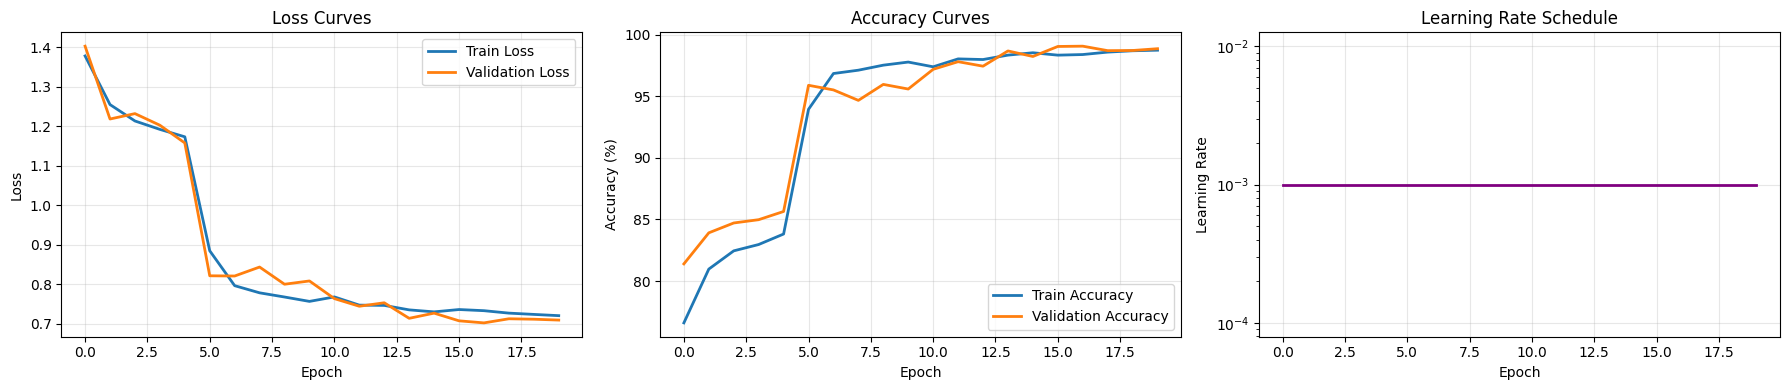

🏆 Best Training Results:
  Best Validation Accuracy: 99.07% (at epoch 17)
  Corresponding Train Accuracy: 98.39%
  Total Epochs Trained: 20 / 15


In [ ]:
# Plot training results
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Loss
axes[0].plot(history['train_loss'], label='Train Loss', linewidth=2)
axes[0].plot(history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss Curves')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Accuracy
axes[1].plot(history['train_acc'], label='Train Accuracy', linewidth=2)
axes[1].plot(history['val_acc'], label='Validation Accuracy', linewidth=2)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_title('Accuracy Curves')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Learning Rate
axes[2].plot(history['learning_rates'], linewidth=2, color='purple')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Learning Rate')
axes[2].set_title('Learning Rate Schedule')
axes[2].set_yscale('log')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Best results
best_val_acc = max(history['val_acc'])
best_epoch = history['val_acc'].index(best_val_acc) + 1

print("🏆 Best Training Results:")
print(f"  Best Validation Accuracy: {best_val_acc:.2f}% (at epoch {best_epoch})")
print(f"  Corresponding Train Accuracy: {history['train_acc'][best_epoch-1]:.2f}%")
print(f"  Total Epochs Trained: {len(history['train_loss'])} / 15")


In [ ]:
# Load the best model
print("🔄 Loading the best model...")
checkpoint = torch.load('best_model.pth', map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])

print(f"✅ Model loaded from epoch {checkpoint['epoch'] + 1}")
print(f"   Saved validation accuracy: {checkpoint['val_acc']:.2f}%")

# Test the model on Test Set
print("\n🧪 Testing model on Test Set...")

model.eval()
test_correct = 0
test_total = 0
all_test_preds = []
all_test_labels = []
all_test_probs = []
test_loss = 0.0

with torch.no_grad():
    pbar = tqdm(test_loader, desc="Testing", leave=False)
    for inputs, labels in pbar:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        probabilities = torch.softmax(outputs, dim=1)
        _, predicted = outputs.max(1)

        test_total += labels.size(0)
        test_correct += predicted.eq(labels).sum().item()

        all_test_preds.extend(predicted.cpu().numpy())
        all_test_labels.extend(labels.cpu().numpy())
        all_test_probs.extend(probabilities.cpu().numpy())

        pbar.set_postfix({
            'Loss': loss.item(),
            'Acc': 100.*test_correct/test_total
        })

test_accuracy = 100. * test_correct / test_total
test_loss = test_loss / len(test_loader)

print(f"\n📊 Test Results:")
print(f"  Test Loss: {test_loss:.4f}")
print(f"  Test Accuracy: {test_accuracy:.2f}%")
print(f"  Correct Predictions: {test_correct}/{test_total}")

# Convert to numpy arrays
all_test_preds = np.array(all_test_preds)
all_test_labels = np.array(all_test_labels)
all_test_probs = np.array(all_test_probs)

🔄 Loading the best model...
✅ Model loaded from epoch 17
   Saved validation accuracy: 99.07%

🧪 Testing model on Test Set...



📊 Test Results:
  Test Loss: 0.7095
  Test Accuracy: 98.84%
  Correct Predictions: 8154/8250


📋 Generating Classification Report...
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab      0.991     1.000     0.995       109
                                 Apple___Black_rot      0.990     1.000     0.995        97
                          Apple___Cedar_apple_rust      1.000     1.000     1.000        31
                                   Apple___healthy      1.000     1.000     1.000       255
                               Blueberry___healthy      1.000     1.000     1.000       255
          Cherry_(including_sour)___Powdery_mildew      1.000     1.000     1.000       153
                 Cherry_(including_sour)___healthy      1.000     0.993     0.996       142
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot      0.950     0.803     0.870        71
                       Corn_(maize)___Common_rust_      1.000     0.989     0.994       176
               Corn_(maize)___Northern_Le

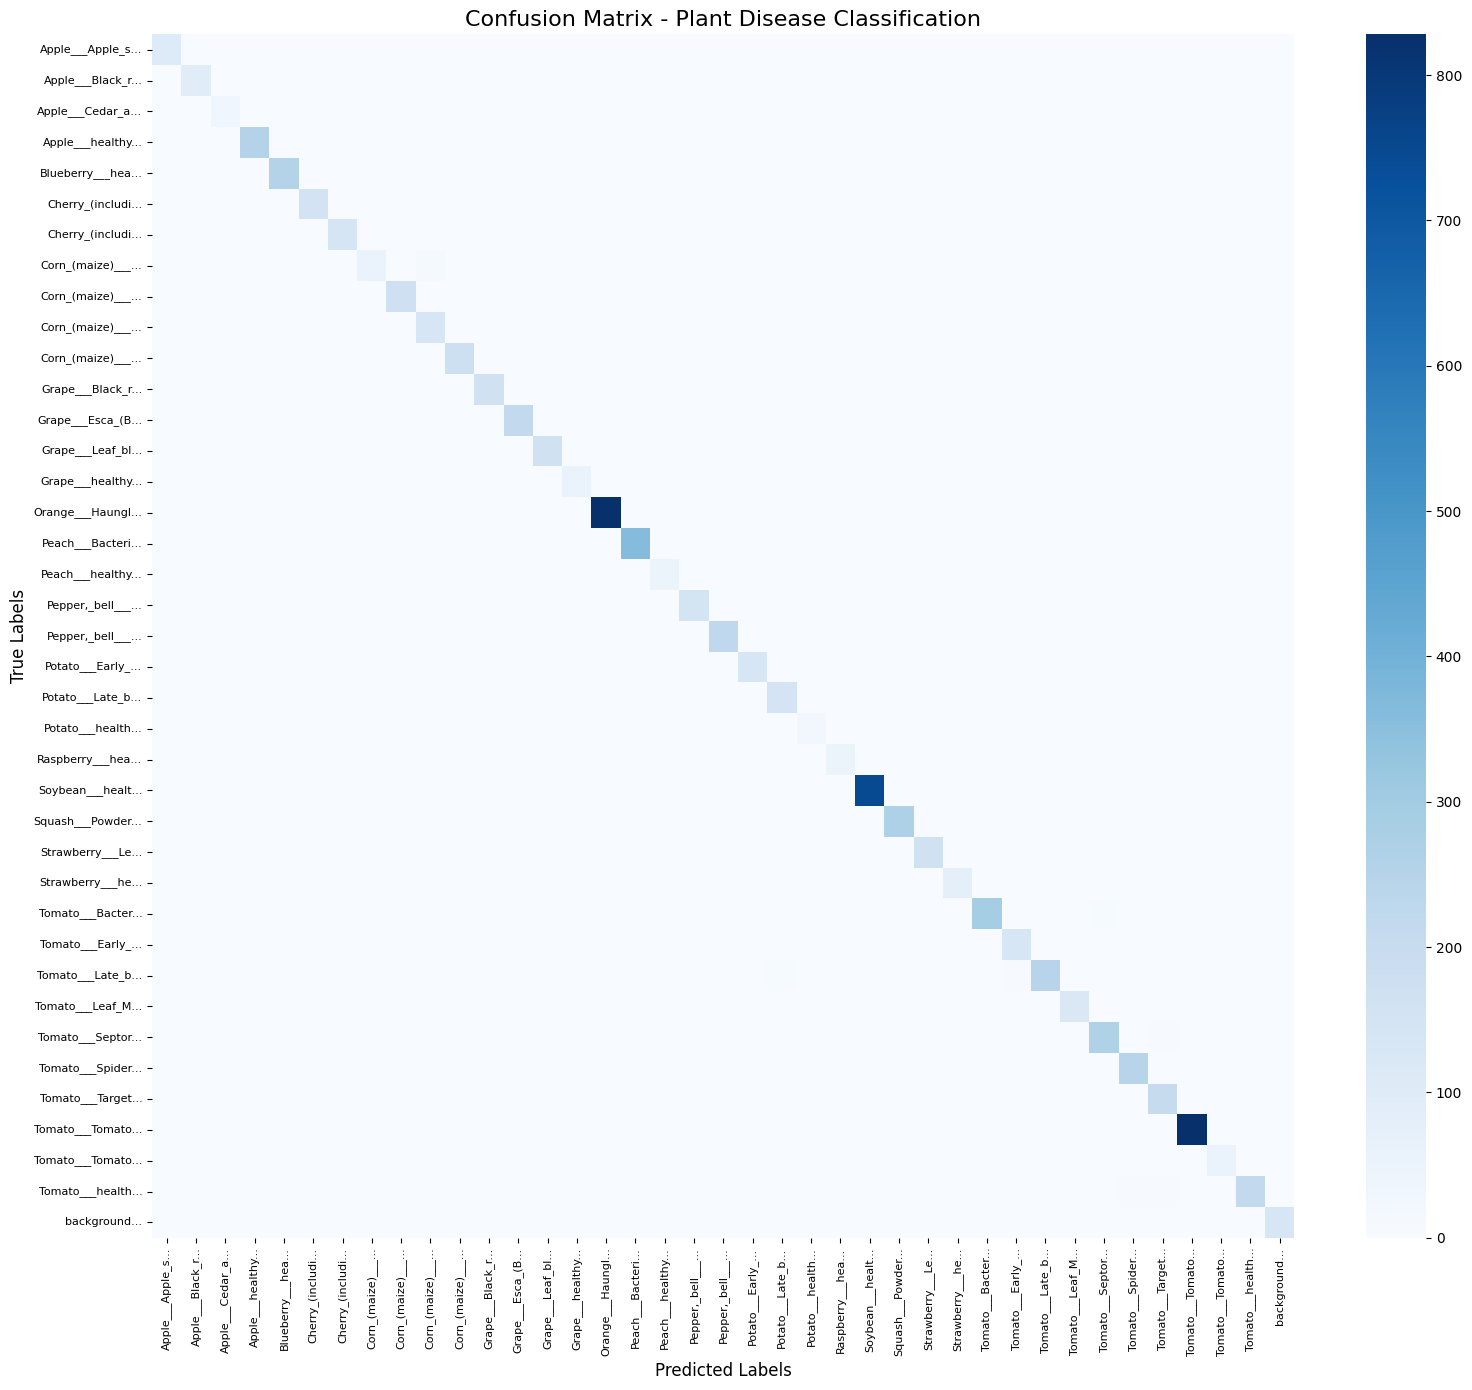


🏆 Top 10 Classes (Highest Accuracy):
   1. background                              : 100.00%
   2. Tomato___Tomato_mosaic_virus            : 100.00%
   3. Peach___healthy                         : 100.00%
   4. Raspberry___healthy                     : 100.00%
   5. Strawberry___healthy                    : 100.00%
   6. Squash___Powdery_mildew                 : 100.00%
   7. Strawberry___Leaf_scorch                : 100.00%
   8. Apple___Apple_scab                      : 100.00%
   9. Cherry_(including_sour)___Powdery_mildew: 100.00%
  10. Apple___Cedar_apple_rust                : 100.00%

📉 Bottom 10 Classes (Lowest Accuracy):
   1. Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 80.28%
   2. Tomato___Bacterial_spot                 : 93.91%
   3. Tomato___Late_blight                    : 94.25%
   4. Tomato___Leaf_Mold                      : 96.06%
   5. Tomato___healthy                        : 96.43%
   6. Tomato___Septoria_leaf_spot             : 97.04%
   7. Corn_(maize)___N

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("📋 Generating Classification Report...")

# Classification Report
class_names = full_dataset.classes
report = classification_report(
    all_test_labels,
    all_test_preds,
    target_names=class_names,
    digits=3
)
print(report)

# Confusion Matrix
print("\n🎯 Generating Confusion Matrix...")

# Calculate confusion matrix
cm = confusion_matrix(all_test_labels, all_test_preds)

# Plot confusion matrix
plt.figure(figsize=(16, 14))
sns.heatmap(cm, annot=False, cmap='Blues', fmt='d',
            xticklabels=[c[:15] + '...' for c in class_names],
            yticklabels=[c[:15] + '...' for c in class_names])
plt.title('Confusion Matrix - Plant Disease Classification', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Calculate class-wise accuracy
class_accuracy = np.zeros(num_classes)
for i in range(num_classes):
    mask = all_test_labels == i
    if np.sum(mask) > 0:
        class_accuracy[i] = np.mean(all_test_preds[mask] == i) * 100

# Show top 10 and bottom 10 classes
print("\n🏆 Top 10 Classes (Highest Accuracy):")
sorted_indices = np.argsort(class_accuracy)[::-1]
for i in range(min(10, num_classes)):
    idx = sorted_indices[i]
    print(f"  {i+1:2d}. {class_names[idx]:40s}: {class_accuracy[idx]:.2f}%")

print("\n📉 Bottom 10 Classes (Lowest Accuracy):")
for i in range(min(10, num_classes)):
    idx = sorted_indices[-(i+1)]
    print(f"  {i+1:2d}. {class_names[idx]:40s}: {class_accuracy[idx]:.2f}%")

🎯 Testing Grad-CAM on sample images...

📊 Sample 1:


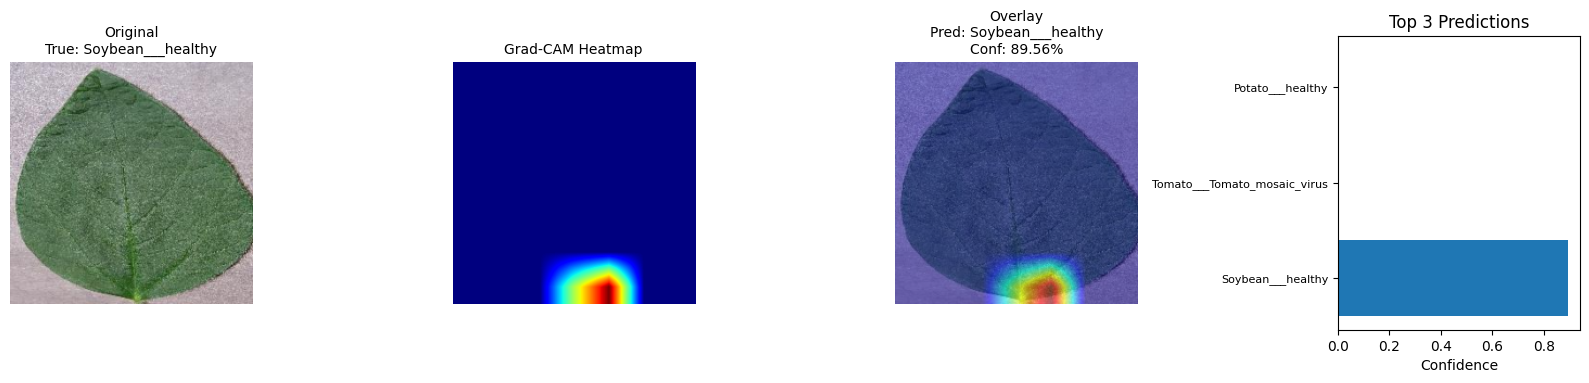

  True Label: Soybean___healthy
  Predicted: Soybean___healthy
  Confidence: 89.56%
  Correct: True

📊 Sample 2:


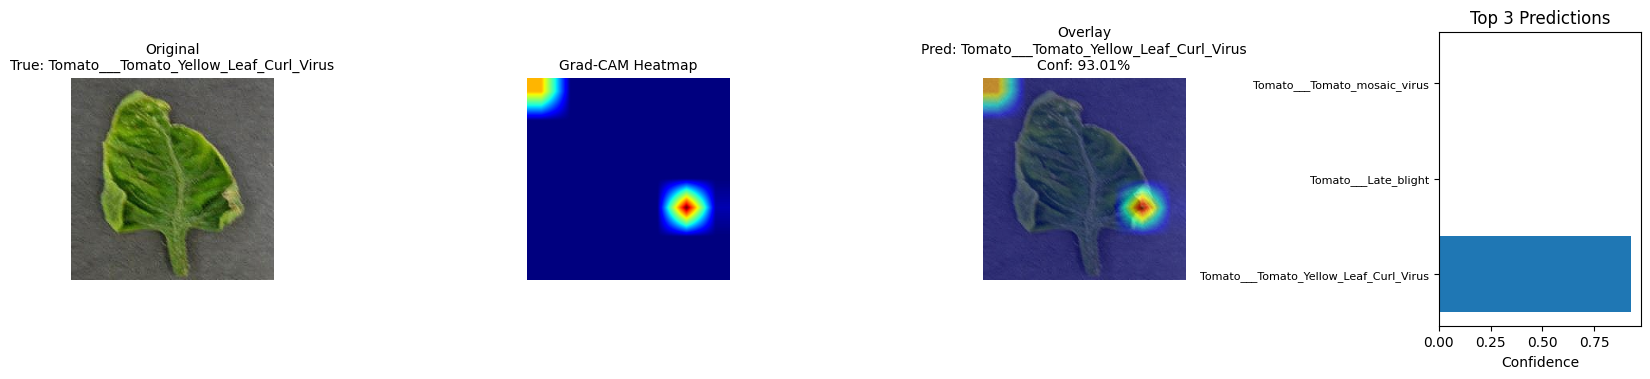

  True Label: Tomato___Tomato_Yellow_Leaf_Curl_Virus
  Predicted: Tomato___Tomato_Yellow_Leaf_Curl_Virus
  Confidence: 93.01%
  Correct: True

📊 Sample 3:


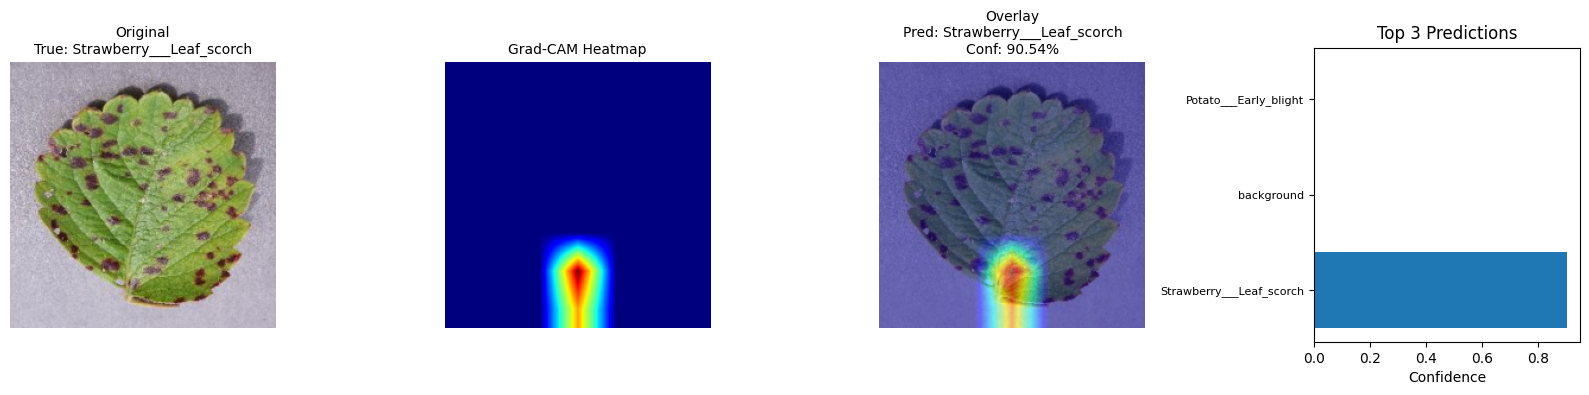

  True Label: Strawberry___Leaf_scorch
  Predicted: Strawberry___Leaf_scorch
  Confidence: 90.54%
  Correct: True

📊 Sample 4:


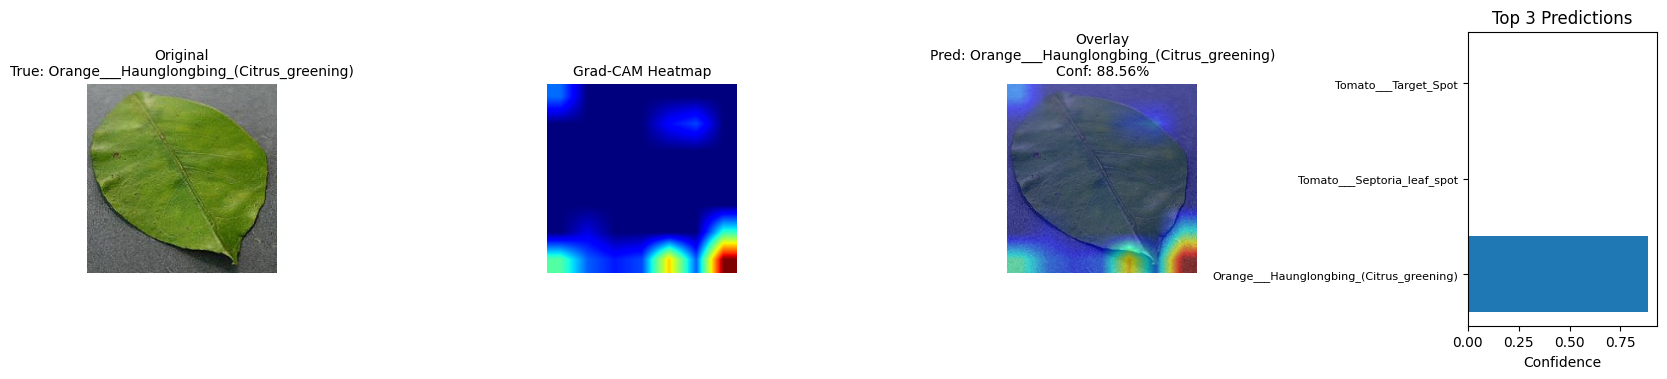

  True Label: Orange___Haunglongbing_(Citrus_greening)
  Predicted: Orange___Haunglongbing_(Citrus_greening)
  Confidence: 88.56%
  Correct: True

📊 Sample 5:


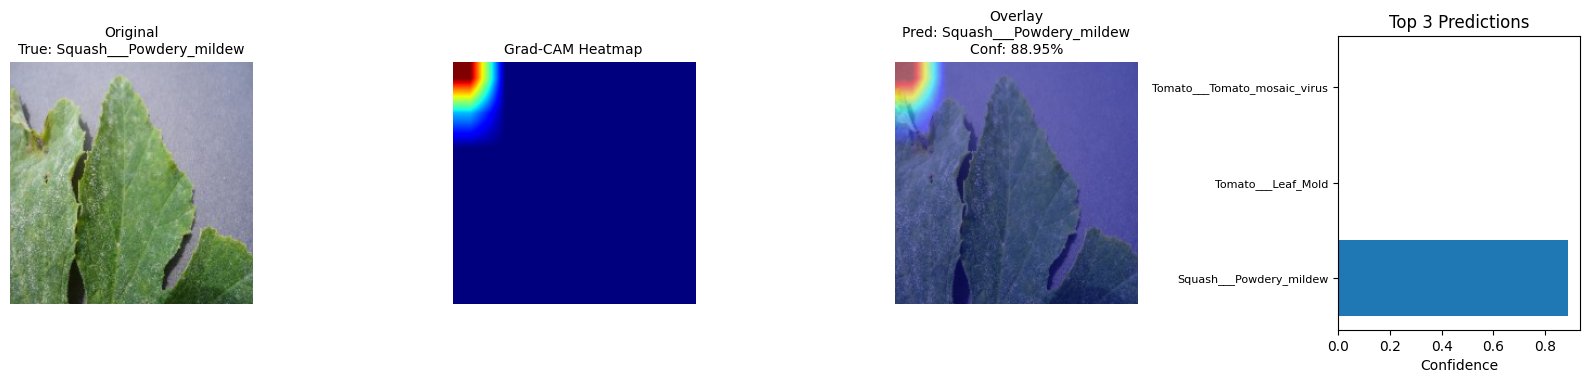

  True Label: Squash___Powdery_mildew
  Predicted: Squash___Powdery_mildew
  Confidence: 88.95%
  Correct: True


In [ ]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

def visualize_gradcam(model, image_tensor, label, class_names, target_layer=None):
    """
    Visualize Grad-CAM for a given image
    """
    # Move to device
    image_tensor = image_tensor.unsqueeze(0).to(device)

    # Get model prediction
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        probabilities = torch.softmax(output, dim=1)
        pred_class = output.argmax(dim=1).item()
        confidence = probabilities[0, pred_class].item()

    # Prepare image for visualization
    image_np = image_tensor.squeeze(0).cpu().numpy()
    image_np = np.transpose(image_np, (1, 2, 0))

    # Denormalize
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image_np = std * image_np + mean
    image_np = np.clip(image_np, 0, 1)

    # Initialize Grad-CAM
    if target_layer is None:
        # Use the last convolutional layer of EfficientNet
        target_layer = model.base_model.features[-1]

    cam = GradCAM(model=model, target_layers=[target_layer])

    # Create target for the predicted class
    targets = [ClassifierOutputTarget(pred_class)]

    # Generate CAM
    grayscale_cam = cam(input_tensor=image_tensor, targets=targets)
    grayscale_cam = grayscale_cam[0, :]

    # Overlay CAM on image
    visualization = show_cam_on_image(image_np, grayscale_cam, use_rgb=True)

    # Create figure
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    # Original image
    axes[0].imshow(image_np)
    axes[0].set_title(f"Original\nTrue: {class_names[label]}", fontsize=10)
    axes[0].axis('off')

    # Heatmap
    axes[1].imshow(grayscale_cam, cmap='jet')
    axes[1].set_title("Grad-CAM Heatmap", fontsize=10)
    axes[1].axis('off')

    # Overlay
    axes[2].imshow(visualization)
    axes[2].set_title(f"Overlay\nPred: {class_names[pred_class]}\nConf: {confidence:.2%}", fontsize=10)
    axes[2].axis('off')

    # Top 3 predictions
    top3_probs, top3_classes = torch.topk(probabilities[0], 3)
    y_pos = np.arange(3)
    axes[3].barh(y_pos, top3_probs.cpu().numpy())
    axes[3].set_yticks(y_pos)
    axes[3].set_yticklabels([class_names[i] for i in top3_classes.cpu().numpy()], fontsize=8)
    axes[3].set_xlabel('Confidence')
    axes[3].set_title('Top 3 Predictions')

    plt.tight_layout()
    plt.show()

    return pred_class, confidence

# Test Grad-CAM on sample images
print("🎯 Testing Grad-CAM on sample images...")

# Get sample images from test set
sample_indices = random.sample(range(len(test_dataset_transformed)), 5)

for i, idx in enumerate(sample_indices):
    print(f"\n📊 Sample {i+1}:")
    # Get the transformed image and true label
    image_tensor, true_label = test_dataset_transformed[idx]

    pred_class, confidence = visualize_gradcam(
        model,
        image_tensor,
        true_label,
        class_names
    )

    print(f"  True Label: {class_names[true_label]}")
    print(f"  Predicted: {class_names[pred_class]}")
    print(f"  Confidence: {confidence:.2%}")
    print(f"  Correct: {pred_class == true_label}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_per_class_accuracy(all_labels, all_preds, class_names, top_k=20):
    num_classes = len(class_names)
    class_accuracies = []
    class_counts = []

    # حساب الدقة لكل كلاس
    for class_idx in range(num_classes):
        mask = (all_labels == class_idx)
        count = np.sum(mask)

        if count > 0:
            acc = np.mean(all_preds[mask] == all_labels[mask])
        else:
            acc = 0

        class_accuracies.append(acc)
        class_counts.append(count)

    # ترتيب النتائج من الأعلى للأقل
    sorted_indices = np.argsort(class_accuracies)[::-1]

    # اختيار أول k فئات فقط (لو عددهم كتير)
    sorted_indices = sorted_indices[:top_k]

    sorted_acc = [class_accuracies[i] for i in sorted_indices]
    sorted_names = [class_names[i] for i in sorted_indices]
    sorted_counts = [class_counts[i] for i in sorted_indices]

    # الرسم
    plt.figure(figsize=(12, 6))
    bars = plt.barh(sorted_names, sorted_acc, color="seagreen")
    plt.xlabel("Accuracy")
    plt.title("Per-Class Accuracy (Top classes)")
    plt.xlim(0, 1)

    # عرض القيم فوق الأعمدة
    for i, v in enumerate(sorted_acc):
        plt.text(v + 0.01, i, f"{v*100:.1f}% ({sorted_counts[i]} samples)",
                 va='center', fontsize=9)

    plt.gca().invert_yaxis()   # علشان الأعلى يظهر فوق
    plt.tight_layout()
    plt.show()

# تشغيل الرسم
plot_per_class_accuracy(all_test_labels, all_test_preds, class_names)